# Load Dataset from Kaggle

In [26]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [27]:
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [28]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [29]:
!kaggle datasets download -d thedevastator/higher-education-predictors-of-student-retention

Dataset URL: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention
License(s): CC0-1.0
higher-education-predictors-of-student-retention.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
!unzip higher-education-predictors-of-student-retention.zip

Archive:  higher-education-predictors-of-student-retention.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset.csv             


# Exploratory Data Analysis

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv("/content/dataset.csv")

In [33]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# SVM

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [35]:
X = df.drop(columns=['Target'])
y = df['Target']

In [36]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [38]:
print(X_train.shape, X_test.shape)

(3096, 34) (1328, 34)


In [39]:
model = SVC(kernel='linear', C=1.0, random_state=42)

In [40]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [41]:
y_train_pred = model.predict(X_train)

In [42]:
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))

Train Accuracy:  0.7822997416020672


In [43]:
print("\nClassification Report for Training Data:\n")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))


Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.85      0.75      0.80       980
    Enrolled       0.57      0.40      0.47       549
    Graduate       0.80      0.94      0.86      1567

    accuracy                           0.78      3096
   macro avg       0.74      0.69      0.71      3096
weighted avg       0.77      0.78      0.77      3096



In [44]:
y_pred = model.predict(X_test)

In [45]:
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Test Accuracy:  0.7643072289156626


In [46]:
print("\nTest Data Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Test Data Classification Report:
               precision    recall  f1-score   support

     Dropout       0.82      0.78      0.80       441
    Enrolled       0.53      0.33      0.40       245
    Graduate       0.78      0.92      0.85       642

    accuracy                           0.76      1328
   macro avg       0.71      0.68      0.68      1328
weighted avg       0.75      0.76      0.75      1328



In [47]:
importance_svm = abs(model.coef_[0])

In [48]:
feature_importance_svm = pd.Series(abs(model.coef_[0]), index=X_train.columns)
print("\nTop features from SVM (Linear Kernel):")
print(feature_importance_svm.sort_values(ascending=False))



Top features from SVM (Linear Kernel):
Tuition fees up to date                           1.389376
International                                     0.712455
Debtor                                            0.403232
Displaced                                         0.347782
Curricular units 2nd sem (approved)               0.345924
Daytime/evening attendance                        0.321222
Curricular units 2nd sem (credited)               0.268164
Curricular units 2nd sem (enrolled)               0.262029
Educational special needs                         0.203486
Gender                                            0.189274
Curricular units 1st sem (credited)               0.122654
Curricular units 1st sem (approved)               0.115609
Scholarship holder                                0.105953
Application order                                 0.085864
Curricular units 1st sem (enrolled)               0.084972
Unemployment rate                                 0.077157
Curricular units

# 5-Fold Cross Validation

In [49]:
model2 = SVC(kernel='linear', C=1.0, random_state=42)

In [50]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

In [51]:
# 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5)

In [52]:
cv_scores = cross_val_score(model2, X_train, y_train, cv=cv, scoring='accuracy')
print(f'5-Fold Cross-Validation Accuracy: {cv_scores.mean()}')

5-Fold Cross-Validation Accuracy: 0.7684162801605087


In [53]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

In [54]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

In [55]:
cv_results = cross_validate(model2, X_train, y_train, cv=cv, scoring=scoring)

In [56]:
print("Cross-Validation Scores for Each Fold:")
for i in range(cv.n_splits):
    print(f"Fold {i+1}:")
    print(f"  Accuracy: {cv_results['test_accuracy'][i]:.4f}")
    print(f"  Precision: {cv_results['test_precision'][i]:.4f}")
    print(f"  Recall: {cv_results['test_recall'][i]:.4f}")
    print(f"  F1-score: {cv_results['test_f1'][i]:.4f}")

Cross-Validation Scores for Each Fold:
Fold 1:
  Accuracy: 0.7516
  Precision: 0.7444
  Recall: 0.7516
  F1-score: 0.7434
Fold 2:
  Accuracy: 0.7803
  Precision: 0.7655
  Recall: 0.7803
  F1-score: 0.7662
Fold 3:
  Accuracy: 0.7771
  Precision: 0.7732
  Recall: 0.7771
  F1-score: 0.7684
Fold 4:
  Accuracy: 0.7625
  Precision: 0.7510
  Recall: 0.7625
  F1-score: 0.7503
Fold 5:
  Accuracy: 0.7706
  Precision: 0.7525
  Recall: 0.7706
  F1-score: 0.7560


In [57]:
print("\nMean Cross-Validation Scores:")
print(f"  Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"  Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"  Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"  Mean F1-score: {cv_results['test_f1'].mean():.4f}")


Mean Cross-Validation Scores:
  Mean Accuracy: 0.7684
  Mean Precision: 0.7573
  Mean Recall: 0.7684
  Mean F1-score: 0.7568


In [58]:
from sklearn.model_selection import cross_val_predict

In [59]:
y_train_cv_pred = cross_val_predict(model2, X_train, y_train, cv=cv)

In [60]:
print("\nCross-Validation Classification Report for Training Data:\n")
print(classification_report(y_train, y_train_cv_pred, target_names=label_encoder.classes_))


Cross-Validation Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.83      0.73      0.78       980
    Enrolled       0.52      0.38      0.43       549
    Graduate       0.79      0.93      0.86      1567

    accuracy                           0.77      3096
   macro avg       0.71      0.68      0.69      3096
weighted avg       0.76      0.77      0.76      3096



In [61]:
y_test_cv_pred = cross_val_predict(model2, X_test, y_test, cv=cv)

In [62]:
print("\nCross-Validation Classification Report for Testing Data:\n")
print(classification_report(y_test, y_test_cv_pred, target_names=label_encoder.classes_))


Cross-Validation Classification Report for Testing Data:

              precision    recall  f1-score   support

     Dropout       0.80      0.74      0.77       441
    Enrolled       0.49      0.31      0.38       245
    Graduate       0.77      0.91      0.83       642

    accuracy                           0.74      1328
   macro avg       0.68      0.65      0.66      1328
weighted avg       0.73      0.74      0.73      1328



# Principal Component Analysis

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [66]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('dim_red', PCA(n_components=10)),          # Reduce dimensions to 10 components
    ('svm', SVC(kernel='linear', C=1.0, random_state=42))  # SVM with linear kernel
])

In [67]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dim_red', PCA(n_components=10)),
                ('svm', SVC(kernel='linear', random_state=42))])

In [68]:
y_train_pred = pipeline.predict(X_train)

In [69]:
y_test_pred = pipeline.predict(X_test)

In [70]:
print("\nClassification Report for Training Data:\n")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))


Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.78      0.73      0.75       980
    Enrolled       0.33      0.05      0.08       549
    Graduate       0.69      0.93      0.79      1567

    accuracy                           0.71      3096
   macro avg       0.60      0.57      0.54      3096
weighted avg       0.66      0.71      0.65      3096



In [71]:
print("\nClassification Report for Testing Data:\n")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report for Testing Data:

              precision    recall  f1-score   support

     Dropout       0.80      0.72      0.76       441
    Enrolled       0.55      0.07      0.12       245
    Graduate       0.67      0.94      0.78       642

    accuracy                           0.71      1328
   macro avg       0.67      0.58      0.55      1328
weighted avg       0.69      0.71      0.65      1328



# PCA and 5-fold CV

In [72]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [73]:
y_train_cv_pred = cross_val_predict(pipeline, X_train, y_train, cv=kf)

In [74]:
print("\nCross-Validation Classification Report for Training Data:\n")
print(classification_report(y_train, y_train_cv_pred, target_names=label_encoder.classes_))


Cross-Validation Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.78      0.72      0.75       980
    Enrolled       0.33      0.06      0.10       549
    Graduate       0.69      0.92      0.79      1567

    accuracy                           0.70      3096
   macro avg       0.60      0.57      0.54      3096
weighted avg       0.65      0.70      0.65      3096



In [75]:
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)

In [76]:
print("\nClassification Report for Test Data:\n")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report for Test Data:

              precision    recall  f1-score   support

     Dropout       0.80      0.72      0.76       441
    Enrolled       0.55      0.07      0.12       245
    Graduate       0.67      0.94      0.78       642

    accuracy                           0.71      1328
   macro avg       0.67      0.58      0.55      1328
weighted avg       0.69      0.71      0.65      1328



# Extra

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

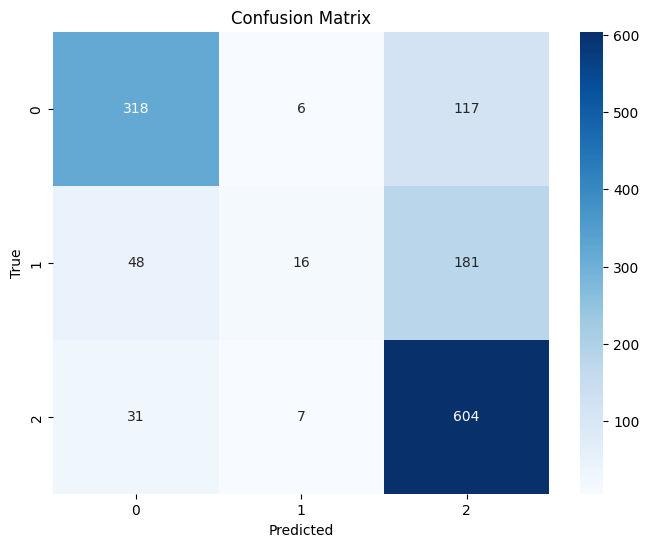

In [78]:
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-81-a48fe0900928>:27: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm, marker='x', label='Test')


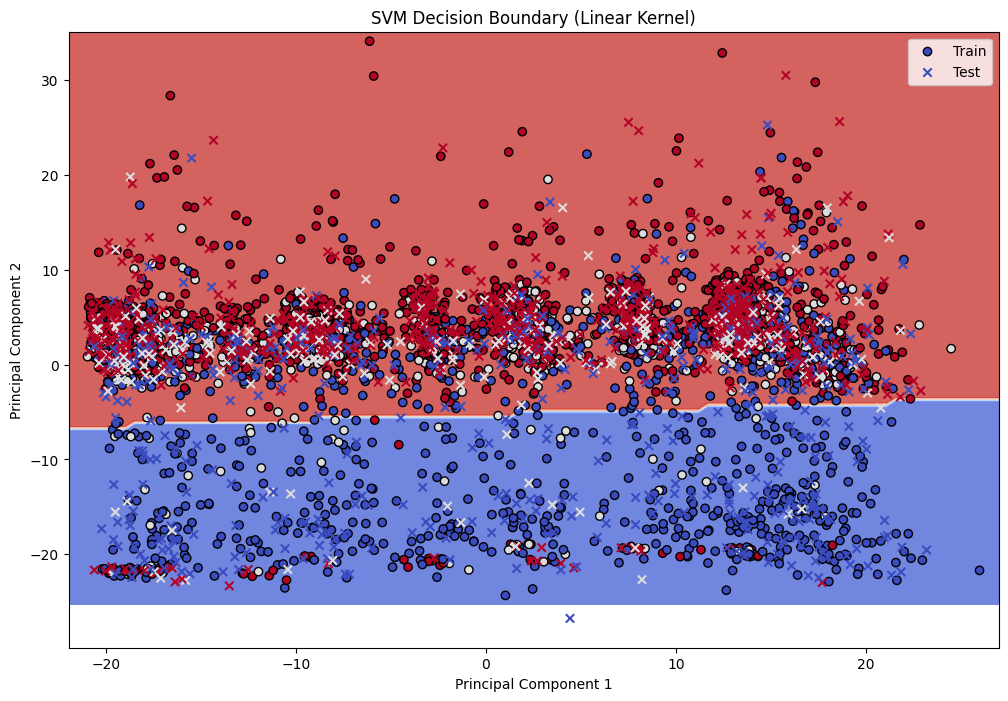

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Retrain SVM with 2D data
model_2d = SVC(kernel='linear', C=1.0, random_state=42)
model_2d.fit(X_train_2d, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on the mesh grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, label='Train')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm, marker='x', label='Test')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()